# Tutorial

## Initialize

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yahoo_fin.stock_info as si

# private module to use yahoo_fin
import mystock_info as mi

##
# import importlib
# importlib.reload(mi)

<module 'mystock_info' from '/Users/jun/git/6-python/stock-analysis/yahoo_fin/mystock_info.py'>

## Overview

This module calls yahoo_fin functions and returns the results by a dataframe. 

**Remarks:** **The downloaded data is cached,** and automatically loaded from the cache if you have new one. The cache is valid for 24 hours in default, but you can change it.

### Download and plot EPS history

- `get_earnings_history()`
- `search_good_eps()`

### Find tickers with high EPS beat ratio

- `search_good_eps()`
- `show_beat_ratio()`

### Download and plot financial data

- `get_financial_data()`
- `plot_financials()`

### In a nut shell

- `get_all_data(tickers, last=20, table=True)`

## Download and plot EPS history

### get_earnings_history(tickers, clear_cache=1, verbose=False)

- front end of [yahoo_fin.stock_info.get_earnings_history()](http://theautomatic.net/yahoo_fin-documentation/#get_earnings_history) 
- arguments:
    - `tickers`: list of tickers or string of a ticker
    - `clear_cache`: number of days cache should be kept

### show_beat_ratio(df,last=40,threshold=95,min_qtrs=20)
- Use this function if you want re-analyze data obtained by mi.search_good_eps()
- Arguments:
    - `last=20`      number of quarters to be considered 
    - `threshold=80` if you want to show only beatratio > 80%. set False to show all data

,ticker,companyshortname,startdatetime,startdatetimetype,epsestimate,epsactual,epssurprisepct,timeZoneShortName,gmtOffsetMilliSeconds,quoteType
0,GOOG,Alphabet Inc.,2021-04-27,TNS,15.88,26.29,65.60,EDT,0,EQUITY
1,GOOG,Alphabet Inc.,2021-02-02,TNS,15.99,22.30,39.50,EDT,0,EQUITY
2,GOOG,Alphabet Inc.,2020-10-29,TNS,11.21,16.40,46.31,EDT,0,EQUITY


ntick: 5, nrow: 2, ncol: 3


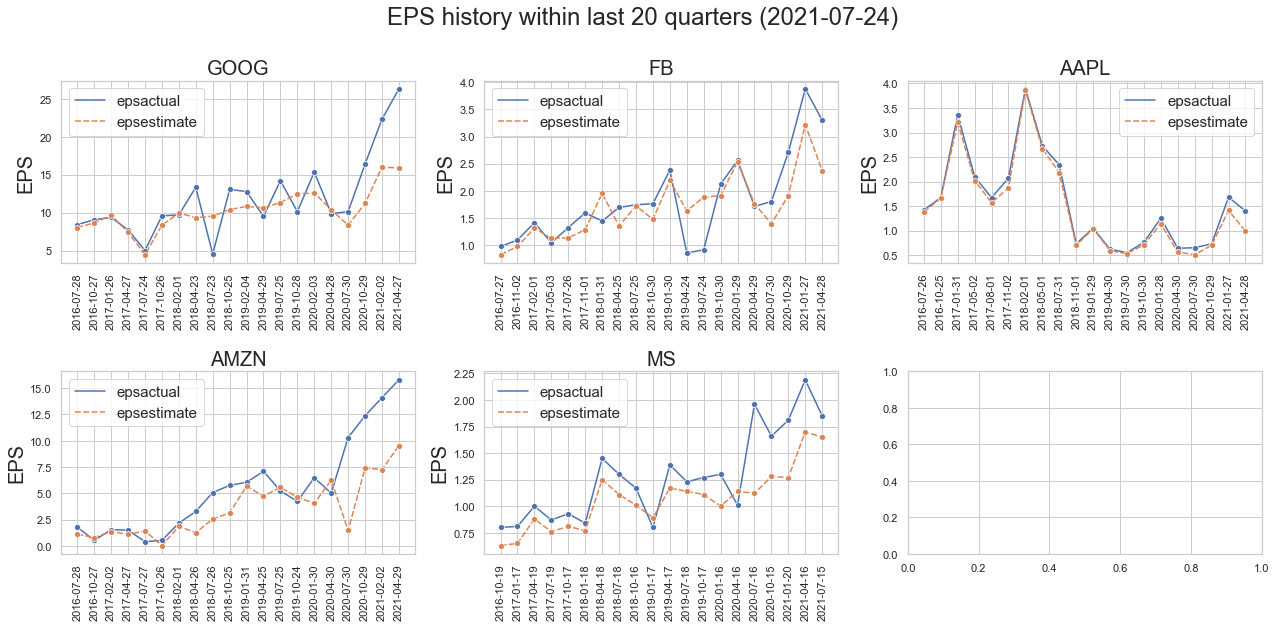

EPS beat ratio (%) within last 20 quarters (2021-07-24)


,,beat ratio,beat,count
ticker,companyshortname,,,
AAPL,Apple Inc.,100.0,20,20
MS,Morgan Stanley,90.0,18,20
AMZN,"Amazon.com, Inc.",75.0,15,20
FB,"Facebook, Inc.",75.0,15,20
GOOG,Alphabet Inc.,70.0,14,20


In [29]:
gafam=["GOOG","FB","AAPL","AMZN","MS"]

df_eps=mi.get_earnings_history(gafam)
display(df.head(3))

mi.plot_eps(df_eps,last=20,largefig=False)
mi.show_beat_ratio(df_eps,threshold=False)

If you prefer larger graphs, set the argument `largefig=True` in `plot_eps()`.

ntick: 1, nrow: 1, ncol: 1


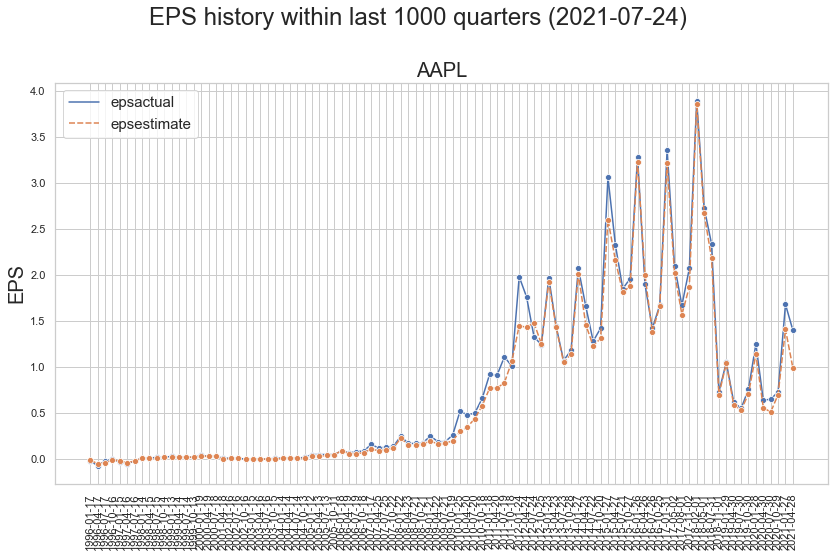

In [40]:
mi.plot_eps(df_eps[df_eps["ticker"]=="AAPL"],largefig=True)

## Find tickers with high EPS beat ratio

### search_good_eps(tickers, last=20, threshold=80, min_qtrs=4, clear_cache=False, verbose=False)
- get EPS history data for `tickers` and shows tickers with EPS beat ratio >= `threshold` within `last` quarters and with at least `min_qtrs` EPS data.
- return value:
    - combined dataframe of get_earnings_history() for all `tickers`, i.e.,
    ```
    for i in tickers:
        tmp=get_earnings_history(i)
        df=df.append(tmp)
    ``` 
- arguments:
    - `last`: number of quarters to be considred
    - `min_qtrs`: number of quarters required for evaluation
    - `clear_cache`: number of days of preserving cache. Set False if you want to use cache despite the creation date.
    - `threshold`: minimum EPS beat ratio in `last` quarters

### show_beat_ratio(df, last=20, threshold=False, min_qtrs=1, verbose=False)
- If you want re-examine the beat ratio from the return value of `mi.search_good_eps()`, you can use this.
    - arguments: `last`, `threshold`, `min_qtrs` are the same as those of `mi.search_good_eps()`.

In [46]:
df_beat=mi.search_good_eps(tickers=gafam, last=20, threshold=80, min_qtrs=4)
mi.show_beat_ratio(df_beat, last=20, threshold=95, min_qtrs=10)

Tickers list of which beat ratio >= 80% within last 20 quarters
(data with more than 4 quarter EPSs)


,,beat ratio,beat,count
ticker,companyshortname,,,
AAPL,Apple Inc.,100.0,20,20
MS,Morgan Stanley,90.0,18,20


Tickers list of which beat ratio >= 95% within last 20 quarters
(data with more than 10 quarter EPSs)


,,beat ratio,beat,count
ticker,companyshortname,,,
AAPL,Apple Inc.,100.0,20,20


## Download and plot financial data


### get_financial_data(tickers, clear_cache=7, verbose=False)
- download financial data including PSR, PBR, PER using [`yahoo_fin.stock_info.get_quote_table()`](http://theautomatic.net/yahoo_fin-documentation/#get_quote_table) and [`yahoo_fin.stock_info.get_stats_valuation()`](http://theautomatic.net/yahoo_fin-documentation/#get_stats_valuation), and returns the combined dataframe.
- return value:
    - dataframe of the financial data of `tickers`
    
### plot_financials(df, table=False)
- plot histogram of PSR distribution and print the PSR ranking
- return value:
    - dataframe sorted by PSR
- arguments:
    - `df`: return value from `get_financial_data()`

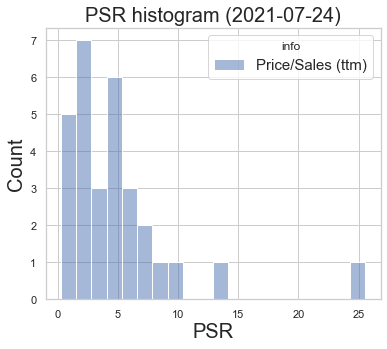

PSR sorted list (<function today at 0x7f9c6ce9cee0>)


info,Market Cap,Previous Close,1y Target Est,Price/Sales (ttm),PE Ratio (TTM),Price/Book (mrq),Earnings Date
Ticker,,,,,,,
V,545.956B,248.55,268.97,25.57,51.29,15.43,"Jul 27, 2021"
MSFT,2.114T,281.03,298.92,13.22,38.26,15.73,"Jul 27, 2021"
CRM,229.907B,242.11,278.66,10.29,52.35,5.40,"Aug 23, 2021 - Aug 27, 2021"
MCD,175.164B,236.88,258.34,8.93,34.07,NaN,"Jul 28, 2021"
AAPL,2.45T,145.40,159.34,7.53,33.00,35.41,"Jul 27, 2021"
KO,243.179B,56.44,59.80,7.27,33.77,11.94,"Jul 21, 2021"
NKE,252.558B,161.69,180.88,5.67,44.90,19.77,"Sep 20, 2021 - Sep 24, 2021"
AMGN,140.616B,244.85,254.96,5.59,20.27,15.08,"Aug 03, 2021"
DIS,318.199B,176.89,206.97,5.45,NaN,3.72,"Aug 12, 2021"


In [36]:
tickers_dow = si.tickers_dow() # get ticker list of NY Dow

df_psr=mi.get_financial_data(tickers_dow, clear_cache=7)
df_psr_sorted=mi.plot_financials(df_psr, table=True)

## In a nut shell

You can get both of EPS history and financial data by `mi.get_all_data()`.

### get_all_data(tickers, last=20, table=True)
- run the following
    1. download EPS history (`get_earnings_history()`))
    2. download financial data (`get_financial_data()`)
    3. shows the EPS beat ratios in 'last' quarters (`show_beat_ratio()`)
- arguments:
    - `tickers`: list of tickers 
    - `last=20`: number of quarters to be considred to get EPS beat ratio
    - `table=False`: show the table of EPS beat ratio or not
- return value: tuple of return values of get_earnings_history() and get_financial_data()

ntick: 5, nrow: 2, ncol: 3


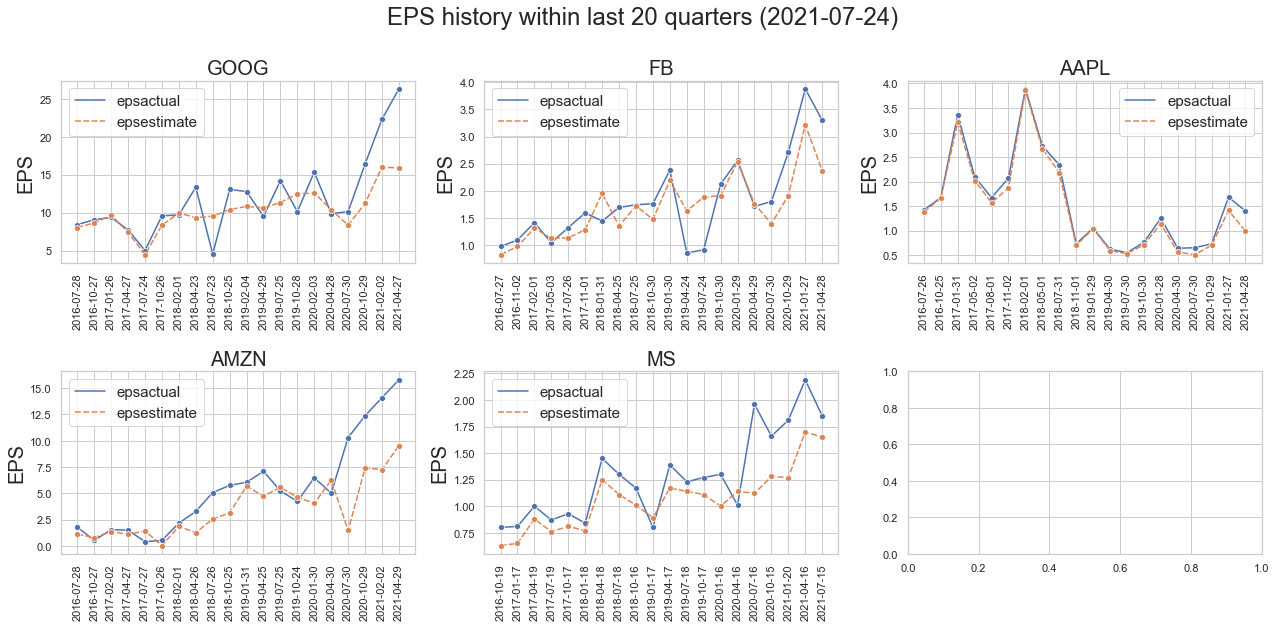

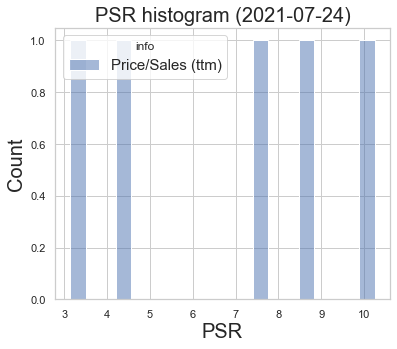

The top 5 PSR stocks (<function today at 0x7f9c6ce9cdc0>)


info,Market Cap,Previous Close,1y Target Est,Price/Sales (ttm),PE Ratio (TTM),Price/Book (mrq),Earnings Date
Ticker,,,,,,,
FB,967.346B,344.46,386.47,10.25,29.23,7.25,"Jul 28, 2021"
GOOG,1.733T,2625.33,2625.00,8.81,35.14,7.69,NaN
AAPL,2.45T,145.40,159.34,7.53,33.00,35.41,"Jul 27, 2021"
AMZN,1.802T,3631.20,4241.33,4.30,67.99,17.43,"Jul 28, 2021 - Aug 02, 2021"
MS,173.405B,95.57,98.53,3.14,12.53,1.79,"Oct 13, 2021 - Oct 18, 2021"


info,Market Cap,Previous Close,1y Target Est,Price/Sales (ttm),PE Ratio (TTM),Price/Book (mrq),Earnings Date
Ticker,,,,,,,
FB,967.346B,344.46,386.47,10.25,29.23,7.25,"Jul 28, 2021"
GOOG,1.733T,2625.33,2625.00,8.81,35.14,7.69,NaN
AAPL,2.45T,145.40,159.34,7.53,33.00,35.41,"Jul 27, 2021"
AMZN,1.802T,3631.20,4241.33,4.30,67.99,17.43,"Jul 28, 2021 - Aug 02, 2021"
MS,173.405B,95.57,98.53,3.14,12.53,1.79,"Oct 13, 2021 - Oct 18, 2021"


In [45]:
df_all=mi.get_all_data(gafam, table=False)
mi.plot_eps(df_all[0],last=20) # show EPS history within last 20 quarters
mi.plot_financials(df_all[1])

# Just testing

### def get_revenue(tickers, clear_cache=7, verbose=False):

get revenue data using si.get_earnings() and return in dict format.

return value:
- dict of which keys are 'quarterly_results', 'yearly_revenue_earnings', and  'quarterly_revenue_earnings' and values are dataframe for `tickers`.

In [142]:
display(ret)

{'quarterly_results':      date  actual  estimate Ticker
 0  3Q2020    0.72      0.64   VEEV
 1  4Q2020    0.78      0.68   VEEV
 2  1Q2021    0.78      0.68   VEEV
 3  2Q2021    0.91      0.78   VEEV
 0  2Q2020   -0.31     -0.35   MRNA
 1  3Q2020   -0.59     -0.43   MRNA
 2  4Q2020   -0.69     -0.35   MRNA
 3  1Q2021    2.84      2.39   MRNA
 0  2Q2020   -0.45     -0.07   BNTX
 1  3Q2020   -1.07     -0.45   BNTX
 2  4Q2020    1.92     -0.18   BNTX
 3  1Q2021    5.21      3.67   BNTX
 0  2Q2020    0.78      0.66    PFE
 1  3Q2020    0.72      0.71    PFE
 2  4Q2020    0.42      0.48    PFE
 3  1Q2021    0.93      0.77    PFE
 0  2Q2020   10.26      8.03   BIIB
 1  3Q2020    8.84      8.04   BIIB
 2  4Q2020    4.58      4.87   BIIB
 3  1Q2021    5.34      5.04   BIIB,
 'yearly_revenue_earnings':    date      revenue     earnings Ticker
 0  2018    690559000    151177000   VEEV
 1  2019    862210000    229832000   VEEV
 2  2020   1104081000    301118000   VEEV
 3  2021   1465069000    37

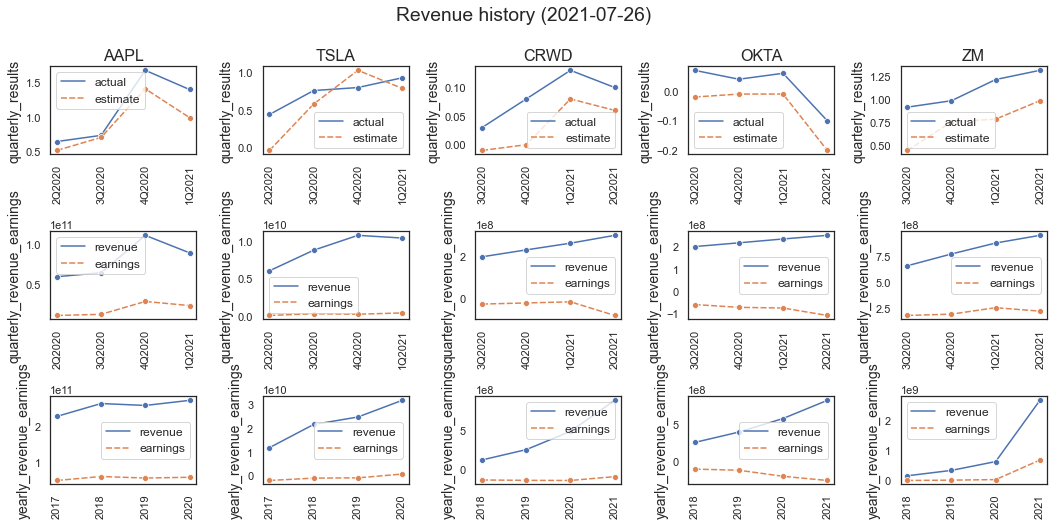

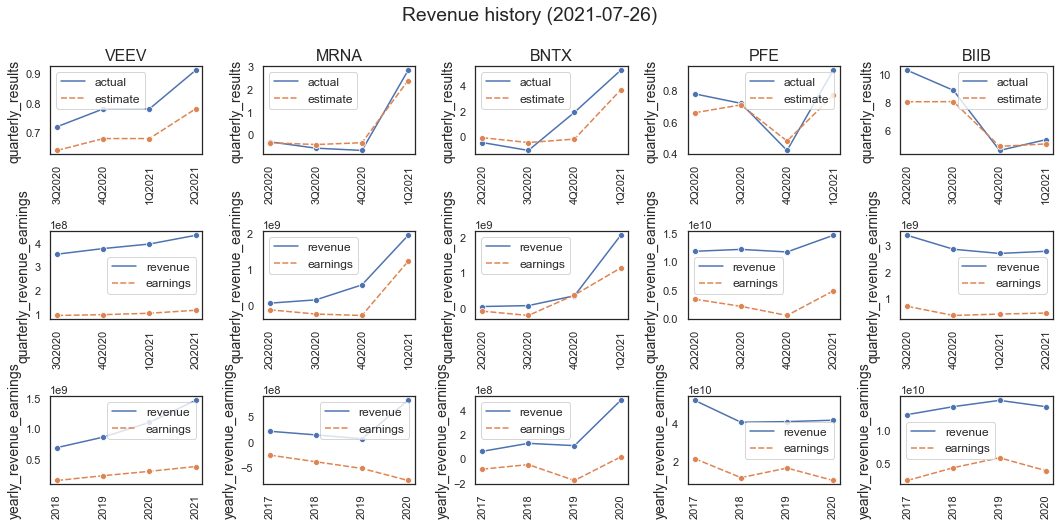

In [143]:
import importlib
importlib.reload(mi)

ret=mi.get_revenue(["aapl","tsla","crwd","okta","zm"],clear_cache=1,verbose=False)
#display(ret)
mi.plot_revenue(ret)
ret=mi.get_revenue(["veev","mrna","bntx","pfe","biib"],clear_cache=1,verbose=False)
#display(ret)
mi.plot_revenue(ret)